<a href="https://colab.research.google.com/github/Maisha1714/Decision_Tree/blob/main/DecisionTree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('sample_ex.csv')

In [ ]:
df


# # Feature Engineering

# Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


In [ ]:
df['Transportation mode'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [ ]:
df

,Gender,Car ownership,Travel cost,Income level,Transportation mode
0,1,0,2,1,0
1,1,1,2,2,0
2,0,1,2,2,2
3,0,0,2,1,0
4,1,1,2,2,0
5,1,0,1,2,2
6,0,1,1,2,2
7,0,1,0,0,1
8,1,2,0,2,1
9,0,2,0,0,1


In [ ]:
df['Transportation mode'].unique()


# # X , Y Assigning

array([0, 2, 1])

In [ ]:
X = df.drop(['Transportation mode'], axis=1)

y = df['Transportation mode']



In [ ]:
X

,Gender,Car ownership,Travel cost,Income level
0,1,0,2,1
1,1,1,2,2
2,0,1,2,2
3,0,0,2,1
4,1,1,2,2
5,1,0,1,2
6,0,1,1,2
7,0,1,0,0
8,1,2,0,2
9,0,2,0,0


In [ ]:
y

,Transportation mode
0,0
1,0
2,2
3,0
4,0
5,2
6,2
7,1
8,1
9,1


In [ ]:
import numpy as np
values = np.array([y])
searchval = 0
ii = np.where(values == searchval)[0]
ii


array([0, 0, 0, 0, 0])

In [ ]:

searchval = 1
ii = np.where(values == searchval)[1]
ii

array([ 7,  8,  9, 10])

In [ ]:
searchval = 2
ii = np.where(values == searchval)[1]
ii


array([ 2,  5,  6, 11])

In [ ]:
sum


# # Split  X and y into training and testing sets

<function sum(iterable, /, start=0)>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((10, 4), (3, 4))

In [ ]:
X_train.dtypes

,0
Gender,int64
Car ownership,int64
Travel cost,int64
Income level,int64


In [ ]:
X_train

,Gender,Car ownership,Travel cost,Income level
8,1,2,0,2
5,1,0,1,2
2,0,1,2,2
1,1,1,2,2
12,1,0,2,1
4,1,1,2,2
7,0,1,0,0
10,0,2,0,0
3,0,0,2,1
6,0,1,1,2


In [ ]:
X_test

,Gender,Car ownership,Travel cost,Income level
11,1,0,1,2
9,0,2,0,0
0,1,0,2,1


In [ ]:

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


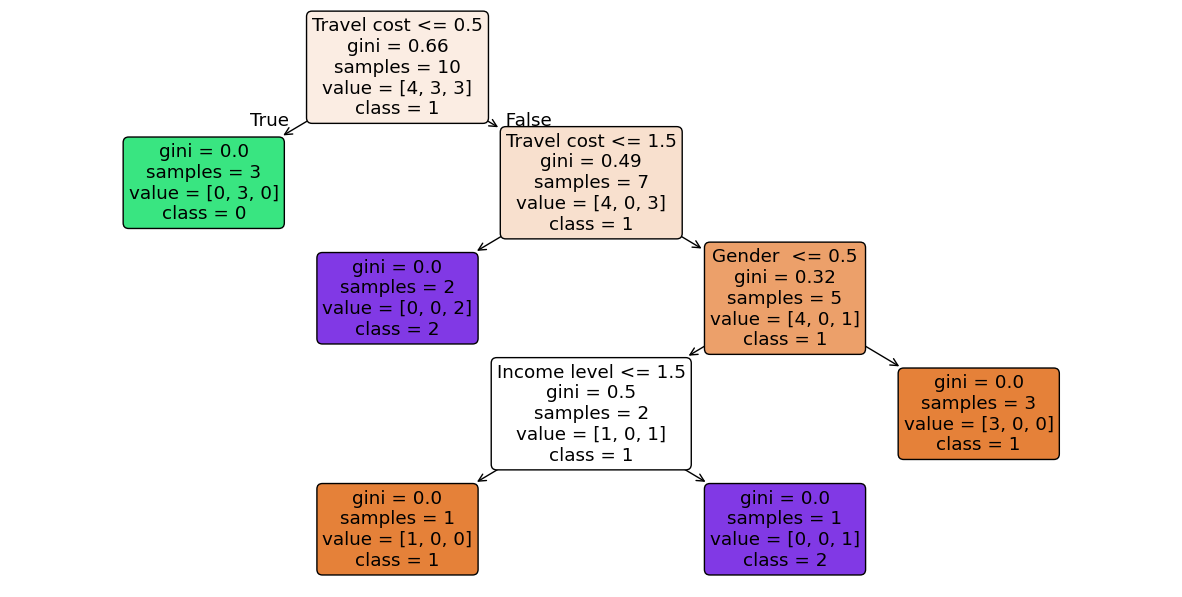

In [ ]:
plt.figure(figsize =(15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded= True,
         class_names =["1", "0","2"],
         feature_names = X.columns);


Train accuracy: 1.0
Test accuracy: 1.0


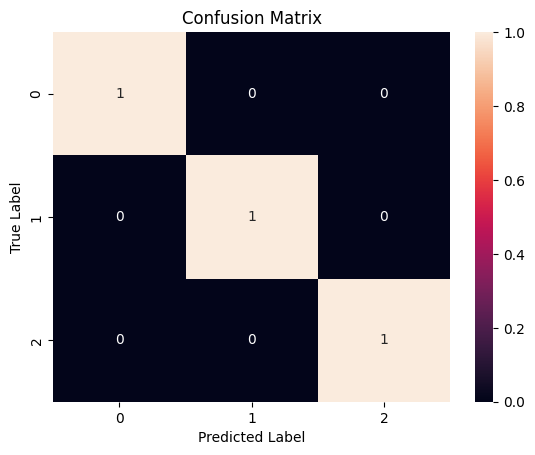

Sensitivity (Recall): 1.0
False Positive Rate (FPR): 0.0
Specificity: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score

# Fit the decision tree classifier on the train set

clf_dt.fit(X_train, y_train)

# Make predictions on the train set
train_pred = clf_dt.predict(X_train)

# Make predictions on the test set
test_pred = clf_dt.predict(X_test)

# Calculate the accuracy of the classifier on the train set
train_acc = accuracy_score(y_train, train_pred)

# Calculate the accuracy of the classifier on the test set
test_acc = accuracy_score(y_test, test_pred)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# # Calculate the confusion matrix of the classifier on the test set
# conf_mat = confusion_matrix(y_test, test_pred)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate performance metrics
sensitivity = TP / (TP + FN)
FPR = FP / (FP + TN)
specificity = TN / (TN + FP)


# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Print metrics
print("Sensitivity (Recall):", sensitivity)
print("False Positive Rate (FPR):", FPR)
print("Specificity:", specificity)




